In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [3]:
from YT_implementations import *
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
# Undefined values processing

# From documentation, list of features which may be undefined
undefined_cols=[0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]

for c in undefined_cols:
    undefined_lines = (tX[:, c]==-999)
    tX[undefined_lines, c] = 0

In [6]:
# Data preprocessing

mean = np.mean(tX, axis=0)
std = np.std(tX, axis=0)

tX_train = standardization(tX, mean, std)

[29 16  2 10 17 25 13 15 27 28  8 20 24 19  8 25 11 17 12  0 22 12  2  5
 21 16  3  4 23  9]


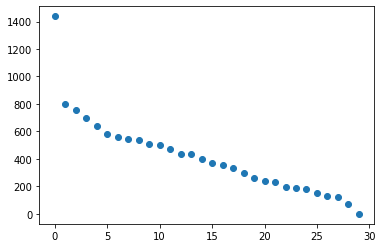

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(tX_train)
x_test = pca.transform(tX_train)

plt.scatter(list(range(30)), pca.singular_values_)

features_ordered = np.abs(pca.components_).argmax(axis=1)
features_top = features_ordered[:20]

print(features_ordered)

In [9]:
tX_train = tX_train[:, features_top]

In [10]:
max_iters=500
seed = 7
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)

### Least Squares GD

In [28]:
# Hyperparameter Gamma Tuning for Least Squares GD using Cross-Validation

gammas = np.logspace(-4, 0, 15)
gamma_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y, tX_train, least_squares_GD, max_iters, k_fold, k_indices, gammas, None)


In [29]:
print("optimal gamma : {:f} / accuracy : {:f}".format(gamma_opt, acc_opt))

optimal gamma : 0.071969 / accuracy : 0.679052


Text(0.5, 0, 'gamma')

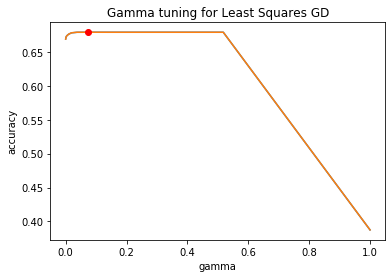

In [30]:
plt.title("Gamma tuning for Least Squares GD")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.plot(gammas, list(zip(accs_tr, accs_te)))
plt.plot(gamma_opt, acc_opt, 'ro')
plt.xlabel("gamma")

In [31]:
test(y, tX_train, least_squares_GD, max_iters, k_fold, k_indices, gamma_opt, None)

Train Loss     : 0.423250 / Test Loss     : 0.423405
Train Accuracy : 0.679052 / Test Accuracy : 0.679052


### Least Squares SGD

In [32]:
# Hyperparameter Gamma Tuning for Least Squares SGD using Cross-Validation

gammas = np.logspace(-4, 0, 15)
gamma_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y, tX_train, least_squares_SGD, max_iters, k_fold, k_indices, gammas, None)


In [33]:
print("optimal gamma : {:f} / accuracy : {:f}".format(gamma_opt, acc_opt))

optimal gamma : 0.002683 / accuracy : 0.669856


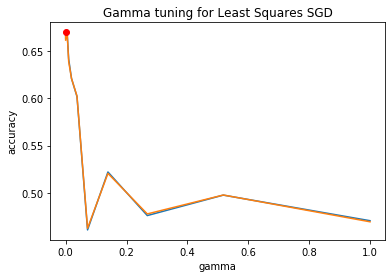

In [34]:
plt.title("Gamma tuning for Least Squares SGD")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.plot(gammas, list(zip(accs_tr, accs_te)))
plt.plot(gamma_opt, acc_opt, 'ro')

In [35]:
# Performance Test for Least Squares SGD
test(y, tX_train, least_squares_GD, max_iters, k_fold, k_indices, gamma_opt, None)

Train Loss     : 0.430232 / Test Loss     : 0.430318
Train Accuracy : 0.673028 / Test Accuracy : 0.673028


### Least Squares

In [39]:
# Degree Tuning for Least Squares using Cross-Validation

degrees = list(range(1, 10))
degree_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y, tX_train, least_squares, max_iters, k_fold, k_indices, degrees, None)


In [40]:
print("optimal degree : {:d} / accuracy : {:f}".format(degree_opt, acc_opt))

optimal degree : 4 / accuracy : 0.764696


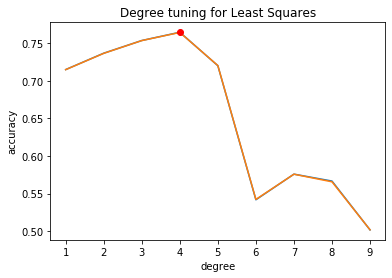

In [41]:
plt.title("Degree tuning for Least Squares")
plt.xlabel("degree")
plt.ylabel("accuracy")
plt.plot(degrees, list(zip(accs_tr, accs_te)))
plt.plot(degree_opt, acc_opt, 'ro')

In [42]:
# Performance Test for Least Squares
test(y, tX_train, least_squares, max_iters, k_fold, k_indices, degree_opt, None)

Train Loss     : 0.325030 / Test Loss     : 9.713119
Train Accuracy : 0.764696 / Test Accuracy : 0.764696


### Ridge Regression

In [43]:
# Hyperparameter and Degree Tuning for Ridge Regression using Cross-Validation

degrees = list(range(1, 10))
lambdas = np.logspace(-4, 0, 15)
lambda_opt, degree_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y, tX_train, ridge_regression, max_iters, k_fold, k_indices, lambdas, degrees)


In [44]:
print("optimal degree : {:d} and lambda : {:f} / accuracy : {:f}".format(degree_opt, lambda_opt, acc_opt))

optimal degree : 4 and lambda : 0.000720 / accuracy : 0.764720


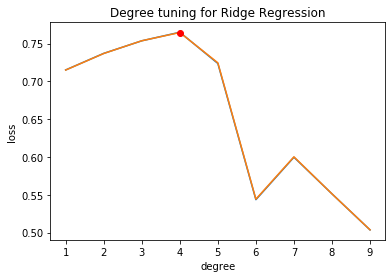

In [45]:
plt.title("Degree tuning for Ridge Regression")
plt.xlabel("degree")
plt.ylabel("loss")
plt.plot(degrees, list(zip(accs_tr, accs_te)))
plt.plot(degree_opt, acc_opt, 'ro')

In [46]:
# Performance Test for Ridge Regression
test(y, tX_train, ridge_regression, max_iters, k_fold, k_indices, degree_opt, lambda_opt)

Train Loss     : 0.325048 / Test Loss     : 4.549552
Train Accuracy : 0.764720 / Test Accuracy : 0.764720


### Logistic Regression

In [18]:
y_logistic = y.copy()
y_logistic[y_logistic == -1] = 0

In [20]:
# Hyperparameter Tuning for Logistic Regression using Cross-Validation

gammas = np.logspace(-4, 0, 15)
gamma_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y_logistic, tX_train, logistic_regression, max_iters, k_fold, k_indices, gammas, None)


In [21]:
print("optimal gamma : {:f} / accuracy : {:f}".format(gamma_opt, acc_opt))

optimal gamma : 0.000100 / accuracy : 0.650904


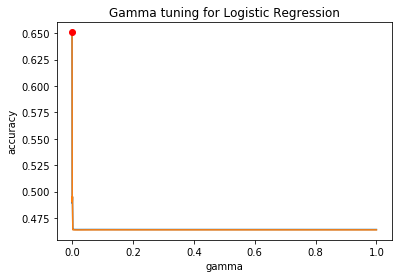

In [22]:
plt.title("Gamma tuning for Logistic Regression")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.plot(gammas, list(zip(accs_tr, accs_te)))
plt.plot(gamma_opt, acc_opt, 'ro')

In [23]:
# Performance Test for Logistic Regression

test(y_logistic, tX_train, logistic_regression, max_iters, k_fold, k_indices, gamma_opt, None)

Train Loss     : 673170.323105 / Test Loss     : 114.194790
Train Accuracy : 0.650904 / Test Accuracy : 0.650904


### Regularized Logistic Regression

In [24]:
# Hyperparameter Tuning for Regularized Ridge Regression using Cross-Validation

gammas = np.logspace(-4, 0, 15)
lambdas = np.logspace(-4, 0, 15)
lambda_opt, gamma_opt, acc_opt, ls_tr, ls_te, accs_tr, accs_te = hyperparameter_tuning(y, tX_train, reg_logistic_regression, max_iters, k_fold, k_indices, lambdas, gammas)


In [25]:
print("optimal gamma : {:f} and lambda : {:f} / accuracy : {:f}".format(gamma_opt, lambda_opt, acc_opt))

optimal gamma : 0.000100 and lambda : 0.000100 / accuracy : 0.696728


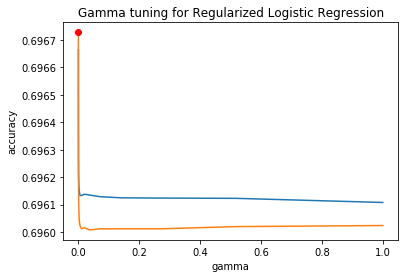

In [26]:
plt.title("Gamma tuning for Regularized Logistic Regression")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.plot(gammas, list(zip(accs_tr, accs_te)))
plt.plot(gamma_opt, acc_opt, 'ro')

In [27]:
test(y_logistic, tX_train, reg_logistic_regression, max_iters, k_fold, k_indices, gamma_opt, lambda_opt)

Train Loss     : 673170.338959 / Test Loss     : 114.194793
Train Accuracy : 0.650904 / Test Accuracy : 0.650904


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv'
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
tX_test = standardization(tX_test, mean, std)
y_logistic = y_test.copy()
y_logistic[y_logistic == -1] = 0

initial_w = np.zeros(tX_test.shape[1])
weights, _ = reg_logistic_regression(y_logistic, tX_test, lambda_opt, initial_w, max_iters, gamma_opt)

In [ ]:
OUTPUT_PATH = 'output.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
compute_accuracy(pd.read_csv(OUTPUT_PATH).Prediction.values.tolist(), y_test)